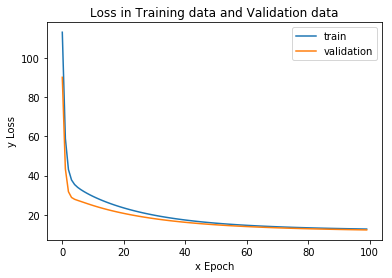

In [19]:
%matplotlib inline

import matplotlib.pyplot as plt
from sklearn.externals.joblib import Memory
from sklearn.datasets import load_svmlight_file
from sklearn.model_selection import train_test_split
import numpy as np

# get train data and validation data
def get_data():
    data = load_svmlight_file("housing_scale.txt")
    return data[0], data[1]
X, y = get_data()
X_train, X_validation, y_train, y_validation = train_test_split(X, y, test_size=0.33, random_state=42)

eta=0.1;
# bias
b=0;
# w
w=np.zeros(13);
# gradient
d_b=0;
d_w=np.zeros(13);
#设置允许误差值
epsilon = 1
# m
m=len(y_train)
m_validation=len(y_validation)
# 
Epochs=100
#train and validation loss array
train_loss_arr=[]
validation_loss_arr=[]

for count in range(Epochs):    
    # calculate the gradient
    b_tmp = b;
    w_tmp = w.copy();
    d_b = 0;
    d_w = np.zeros(13);
    for i in range(m):
        d_b += (b_tmp + X_train[i].dot(w_tmp) - y_train[i])
        for j in range(13):
            d_w[j] += (b_tmp + X_train[i].dot(w_tmp) - y_train[i])*(X_train[i,j])
    d_b = -d_b/m
    d_w = -d_w/m
    
     # update
    b += (eta*d_b)
    w += (eta*d_w)
    
    # record loss in traing dataset
    l = 0;
    for i in range(m):
        l += (b + X_train[i].dot(w) - y_train[i]) ** 2
    l=l/(2.0*m);    
    train_loss_arr.append(l)
    
    # record loss in validation dataset
    l_validation = 0;
    for i in range(m_validation):
        l_validation += (b + X_validation[i].dot(w) - y_validation[i]) ** 2
    l_validation=l_validation/(2.0*m_validation)
    validation_loss_arr.append(l_validation)
    
#     if(count >0 and abs(train_loss_arr[count]-train_loss_arr[count-1])<epsilon):
#         break

# plot
plt.xlabel('x Epoch')
plt.ylabel('y Loss')
plt.title("Loss in Training data and Validation data")
plt.plot(list(range(count+1)) , train_loss_arr,label = "train")
plt.plot(list(range(count+1)) , validation_loss_arr,label = "validation")
plt.legend()
plt.show()